<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>Lab - 4</b></center>    
<pre>    

## Simple Linear Regression

## Step 1. Import the necessary libraries

In [65]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

## Step 2. Import the dataset

In [68]:
df = pd.read_csv('50_Startups.csv')

In [70]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


## Step 3 . Check the State Column

In [73]:
df['State'].nunique()

3

In [75]:
df['State'].value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

## Step 4 . Splitting dataset in to input and output

In [78]:
x = df.iloc[::,:4:]
y = df.iloc[::,4::]
x

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida
5,131876.90,99814.71,362861.36,New York
6,134615.46,147198.87,127716.82,California
7,130298.13,145530.06,323876.68,Florida
8,120542.52,148718.95,311613.29,New York
9,123334.88,108679.17,304981.62,California


## Step 5 . Convert state Column into Numeric Column

## Step 5.1 .  Perform Transformation

In [82]:
x1 = pd.get_dummies(x,columns=['State'],drop_first=True)

In [84]:
x1

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,False,True
1,162597.70,151377.59,443898.53,False,False
2,153441.51,101145.55,407934.54,True,False
3,144372.41,118671.85,383199.62,False,True
4,142107.34,91391.77,366168.42,True,False
5,131876.90,99814.71,362861.36,False,True
6,134615.46,147198.87,127716.82,False,False
7,130298.13,145530.06,323876.68,True,False
8,120542.52,148718.95,311613.29,False,True
9,123334.88,108679.17,304981.62,False,False


## Step 6 . Dummy variable trap

In [87]:
# Already Performed using | drop_first =True

## Step 7 Splitting dataset in to Train and Test

In [90]:
from sklearn.model_selection import train_test_split

X = x1
Y = y

X_train,X_test,Y_train,Y_test  = train_test_split(X,Y,test_size=0.2,random_state=42)

print(X_train.shape)

(40, 5)


## Step 8  Import LinearRegression model from linear_model family 

In [93]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

## Step 9  Fit the data

In [96]:
model.fit(X_train,Y_train)

LinearRegression()

## Step 10  Predict the data

In [100]:
y_pred  = model.predict(X_test)
y_pred

array([[126362.87908255],
       [ 84608.45383634],
       [ 99677.49425147],
       [ 46357.46068582],
       [128750.48288504],
       [ 50912.4174188 ],
       [109741.35032702],
       [100643.24281647],
       [ 97599.27574594],
       [113097.42524432]])

## Step 11  Display Result

In [103]:
# y_test and y_predict

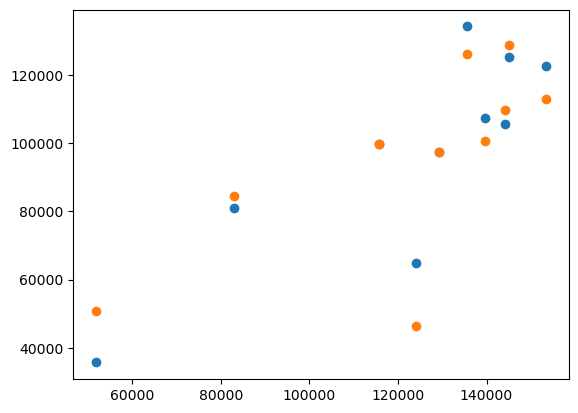

In [112]:
plt.scatter(X_test['Administration'],Y_test)
plt.scatter(X_test['Administration'],y_pred)

## RSS

In [125]:
np.sum((Y_test.values - y_pred) ** 2)

820103630.443011

In [127]:
len(Y_test)

10

In [130]:
from sklearn.metrics import mean_squared_error

In [134]:
mean_squared_error(Y_test,y_pred)

82010363.04430111

In [140]:
mean_squared_error(Y_test,y_pred) * len(y_pred)

820103630.443011

## R Square

In [136]:
from sklearn.metrics import r2_score

In [138]:
r2_score(Y_test,Y_pred)

0.8987266414328636

## Now use Polynomial Regression on Position_Salaries dataset

In [142]:
df = pd.read_csv('Position_Salaries.csv')

In [148]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


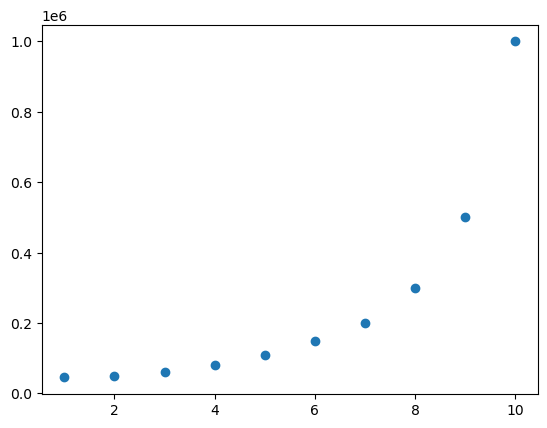

In [146]:
plt.scatter(df['Level'],df['Salary'])

In [200]:
x  = df.iloc[:,1:2].values
y = df.iloc[:,2]


array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [232]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
x_train

array([[ 1],
       [ 8],
       [ 3],
       [10],
       [ 5],
       [ 4],
       [ 7]], dtype=int64)

In [234]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(x_train)
X_poly

array([[  1.,   1.,   1.],
       [  1.,   8.,  64.],
       [  1.,   3.,   9.],
       [  1.,  10., 100.],
       [  1.,   5.,  25.],
       [  1.,   4.,  16.],
       [  1.,   7.,  49.]])

In [245]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train,y_train)

LinearRegression()

Predicted Salary: [201006.87436932]


ValueError: x and y must be the same size

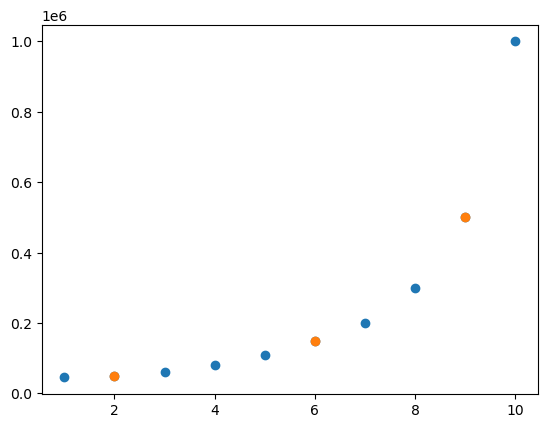

In [252]:
df = pd.read_csv('Position_Salaries.csv')

plt.scatter(df['Level'],df['Salary'])

X = df.iloc[:, 1:2].values   # Level (2D array)
y = df.iloc[:, 2].values    # Salary
x

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
X_poly

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_poly, y_train)

level = 6.5
salary_pred = model.predict(poly.transform([[level]]))
print("Predicted Salary:", salary_pred)

plt.scatter(x_test, y_test)
plt.scatter(x_test,salary_pred)
# plt.plot(X, model.predict(X_poly))
# plt.xlabel("Level")
# plt.ylabel("Salary")
# plt.title("Polynomial Regression")
# plt.show()
